In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from specim_test.specim.specfuncs import spec2d
from specim.specfuncs import spec1d
from astropy.io import fits as pf
from scipy import interpolate

In [2]:
file_loc = 'B0631_spectra/*'

In [5]:
file_list = []
out_file = []
for i,p in enumerate(glob.glob(file_loc)):
    if 'cleaned' in p and 'B0631' in p:

        file_list.append(p)
        frame = p.split('_')[-3][:4]
        out_file.append('B0631_r'+ frame + '_spec1d.fits')

In [6]:
file_list

['B0631_spectra/B0631_r0042_cleaned.fits',
 'B0631_spectra/B0631_r0040_cleaned.fits',
 'B0631_spectra/B0631_r0041_cleaned.fits']


Loading file B0631_spectra/B0631_r0042_cleaned.fits
-----------------------------------------------
Read in 2-dimensional spectrum from B0631_spectra/B0631_r0042_cleaned.fits (HDU=1)
The input dataset was trimmed
 xrange: 240:341.  yrange: 0:4096
Final data dimensions (x y): 101 x 4096

Dispersion axis:              x
N_pixels along dispersion axis: 101

Found 2 NaNs in the two-dimensional spectrum

Old value of dispaxis: x

Dispersion axis:              y
N_pixels along dispersion axis: 4096




<IPython.core.display.Javascript object>


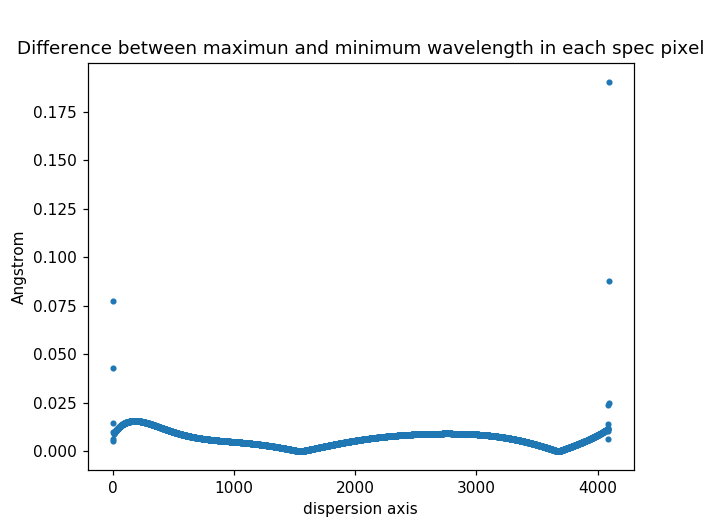

Dispersion : 0.800000
Found 244 NaNs in the two-dimensional spectrum

sky subtracted and cosmic ray rejected data has been resampled in place of the coordinateds whcih rectify the tilted wave image


In [18]:
spec = spec2d.Spec2d(file_list[0], hext=1, xtrim=[240, 340]) 
spec.set_dispaxis('y')
spec.do_waverect(doplot=True)

Profile max value (before normalization) 915.825928


<IPython.core.display.Javascript object>


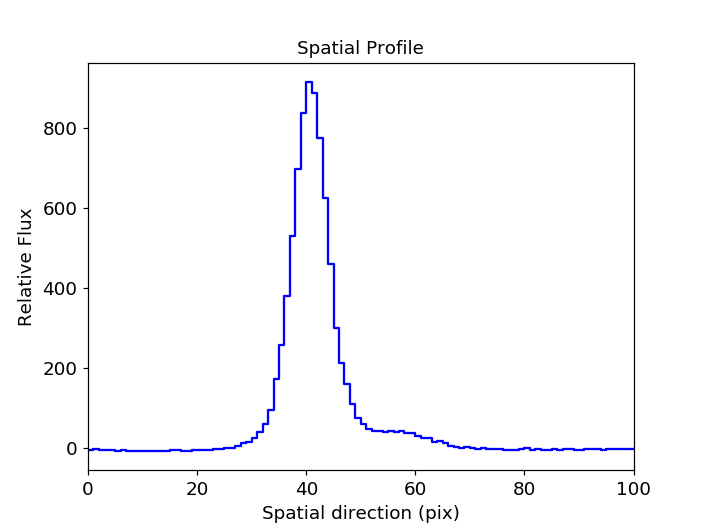

In [29]:
%matplotlib notebook
profile = spec.spatial_profile(pixrange=[1900, 2100])


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 1
Number of Moffat profile : 1

Now enter constants of the background polynomial upto degree 0
c0 : -2

Enter parameter values for a Gaussian profile in following format...
amplitude_value, mu_value, sigma_value

Parameters of Gaussian profile 1 : 60, 58, 4

amplitude=60.000000, mu=58.000000, sigma=4.000000

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 800, 42, 3, 4.765

amplitude=800.000000, x_0=42.000000, gamma=3.000000, alpha=4.765000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2]
Components: 
    [0]: <Polynomial1D(0, c0=-4.43554607)>

    [1]: <Gaussian1D(amplitude=42.16275519, mean=56.9610904

<IPython.core.display.Javascript object>


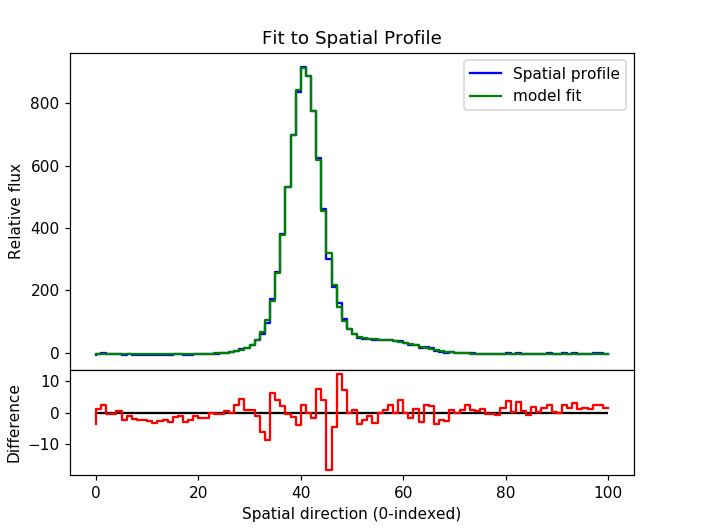

<IPython.core.display.Javascript object>


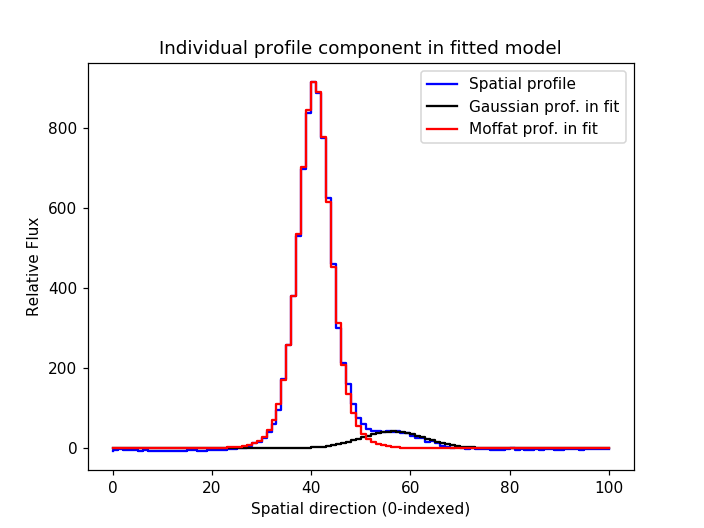


Do you want to start over ? : type yes/no
no


In [40]:
mod = spec.initial_model()

In [41]:
def tie_pos1_gauss(model):
    return model.mean_2 - 6.356     #28.43

def tie_pos1_moffat(model):
     return model.x_0_3 -  6.356
            
def tie_pos2_gauss(model):
     return model.mean_2 + 6.677        # 32.289
    
def tie_pos2_moffat(model):
    return model.x_0_3 + 6.677

def tie_pos3_moffat(model):
    return model.x_0_2 + 15.72 

def tie_pos3_gauss(model):
     return model.mean_4 - 8.61
    
def tie_pos4_moffat(model):
    return model.x_0_6  + 7.8

def tie_pos4_gauss(model):
     return model.mean_1 + 36.76
    

# for two Gaussian and one Moffat  
mod[1].mean.tied = tie_pos3_moffat 
#mod[2].mean.tied = tie_pos2_moffat 
#mod1[4].mean.tied = tie_pos3_moffat

#mod1[4].stddev = 3.0
#mod1[4].stddev.fixed = True

# for two Gaussian profile
#mod[1].mean.tied = tie_pos1_gauss 
#mod[3].mean.tied = tie_pos2_gauss 
#mod1[4].mean.tied = tie_pos4_gauss 
#mod1[4].mean.tied = tie_pos4_gauss 

def tie_std1(model):
    return model.stddev_4 

def tie_amp1(model):
    return model.amplitude_4 *.8

#mod1[2].amplitude.tied = tie_amp1
#mod1[2].stddev.tied = tie_std1 
# for two Moffat profile
#mod1[3].x_0.tied = tie_pos1_gauss
#mod1[4].x_0.tied = tie_pos2_gauss


Initial model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2]
Components: 
    [0]: <Polynomial1D(0, c0=-4.43554607)>

    [1]: <Gaussian1D(amplitude=42.16275519, mean=56.96109048, stddev=6.47014315)>

    [2]: <Moffat1D(amplitude=918.59400241, x_0=41.23999993, gamma=8.0168915, alpha=3.56435061)>
Parameters:
           c0_0           amplitude_1     ...      gamma_2          alpha_2     
    ------------------ ------------------ ... ----------------- ----------------
    -4.435546070823662 42.162755193005296 ... 8.016891500901163 3.56435061038691

-------------------------------------------


Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2]
Components: 
    [0]: <Polynomial1D(0, c0=-4.43521478)>

    [1]: <Gaussian1D(amplitude=42.16266583, mean=56.95998493, stddev=6.47060935)>

    [2]: <Moffat1D(amplitude=918.59132156, x_0=41.23998493, gamma=8.01

<IPython.core.display.Javascript object>


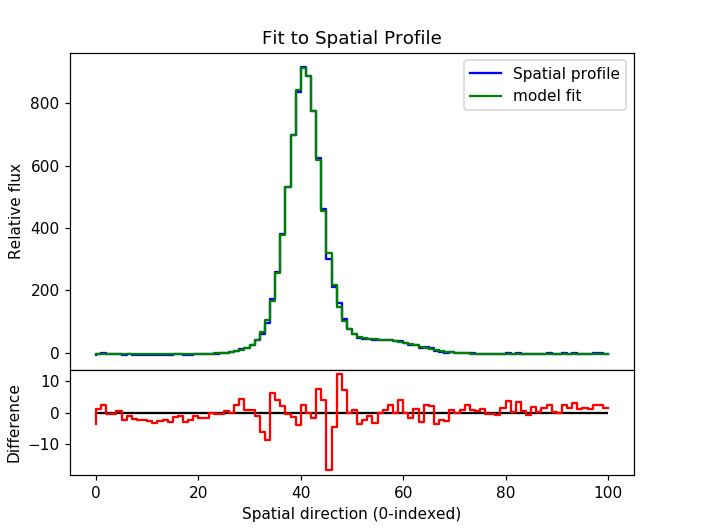

<IPython.core.display.Javascript object>


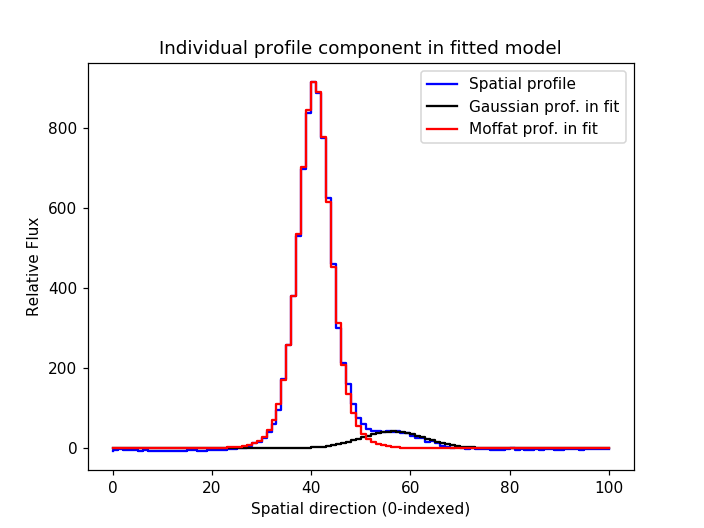

In [42]:
mod_new =spec.refined_model(mod)


Running fit_trace
---------------------------------------------------------
Fitting to the trace at 163 segments
  of the 2D spectrum with stepsize=25 pix ...
    Done
Fitting polynomial of degree 3 to parameter: c0_0
Fitting polynomial of degree 3 to parameter: mean_1
Fitting polynomial of degree 3 to parameter: stddev_1
Fitting polynomial of degree 3 to parameter: x_0_2
Fitting polynomial of degree 3 to parameter: gamma_2
Fitting polynomial of degree 3 to parameter: alpha_2


<IPython.core.display.Javascript object>


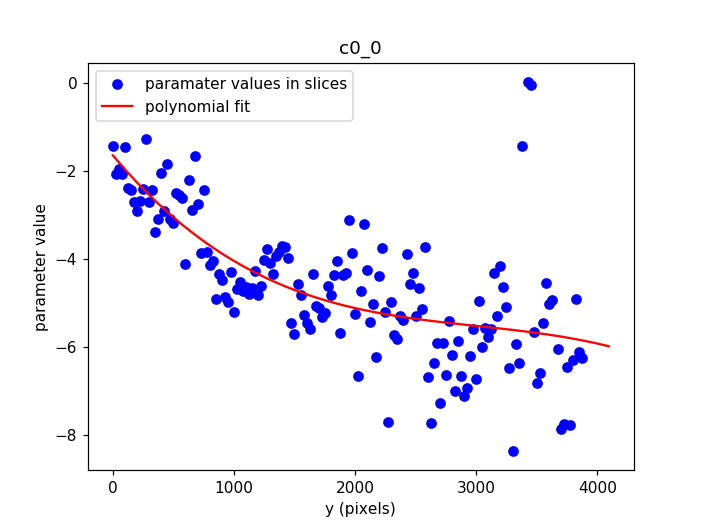

<IPython.core.display.Javascript object>


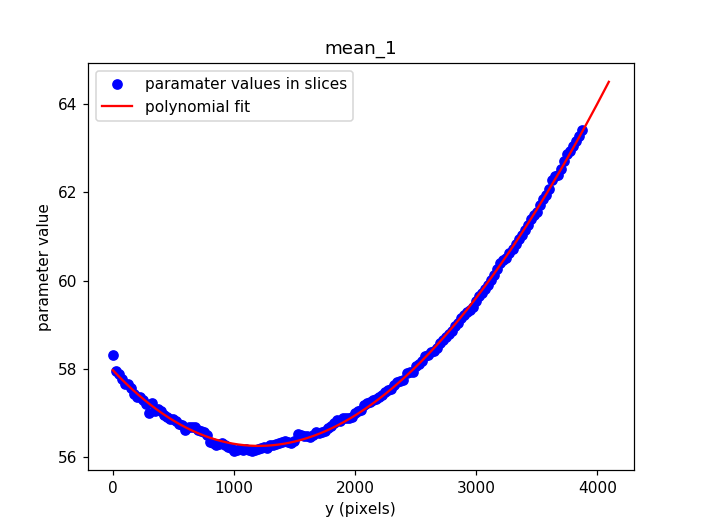

<IPython.core.display.Javascript object>


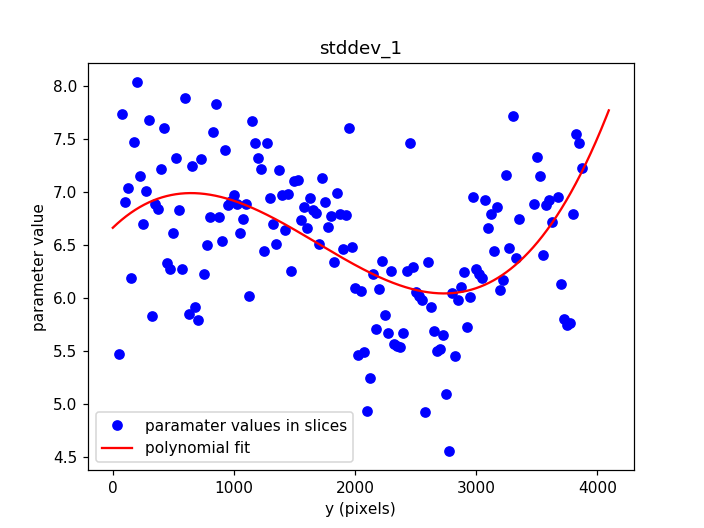

<IPython.core.display.Javascript object>


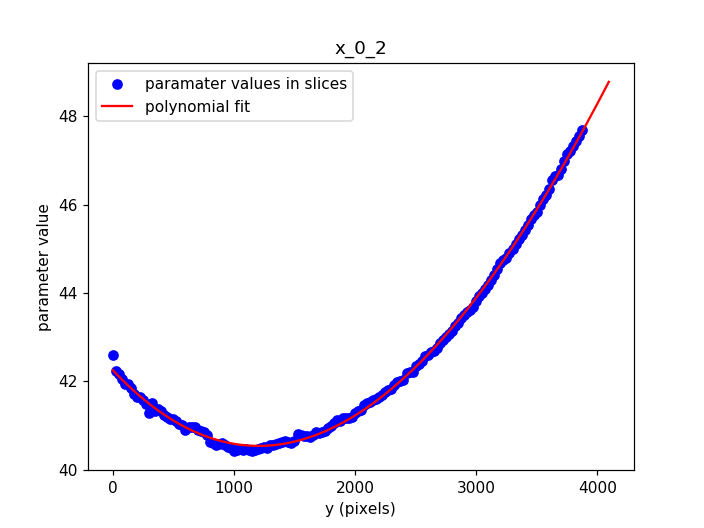

<IPython.core.display.Javascript object>


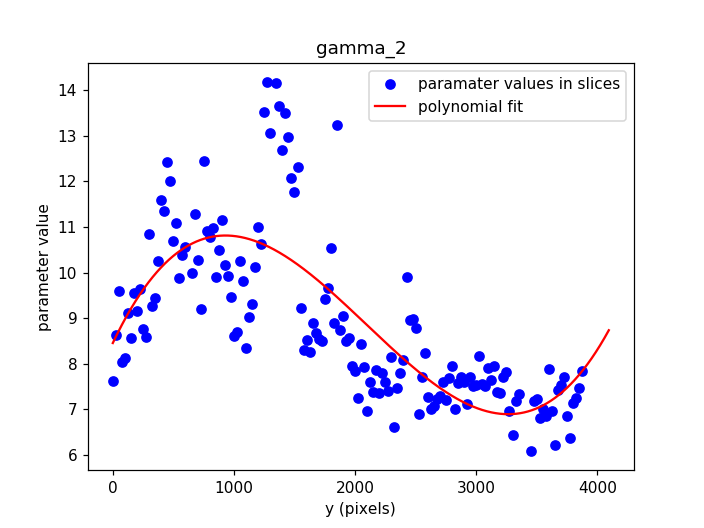

<IPython.core.display.Javascript object>


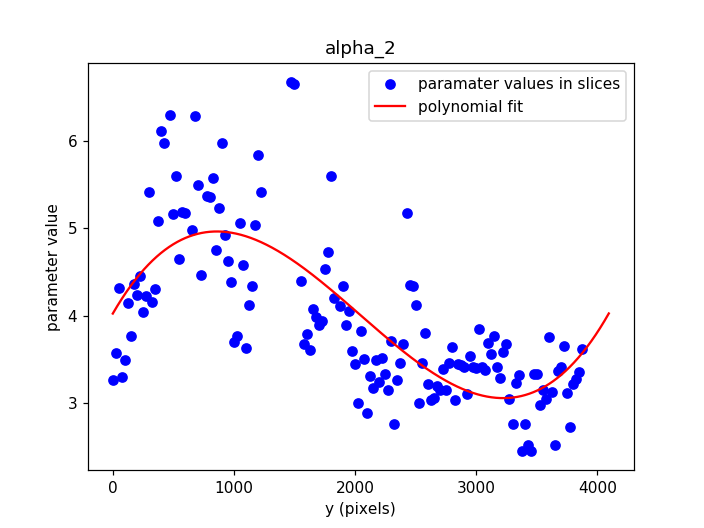

In [43]:
spec.find_and_trace(mod_new, stepsize=25, fitorder={'stddev_1':3, 'mean_1':3, 'gamma_2':3, 'alpha_2':3},
                    fitrange=[0,3900], polyorder=3)

Fitting to 2 components, plus a background
Extracting the spectrum.  Please be patient
 Extraction range (pixels): 0 - 4096
Fitting to the trace at 4096 segments
  of the 2D spectrum with stepsize=1 pix ...
 Spectrum Start:  5649.10
 Spectrum End:     8925.10
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80

 Spectrum Start:  5649.10
 Spectrum End:     8925.10
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80


Plotting the spectrum


<IPython.core.display.Javascript object>


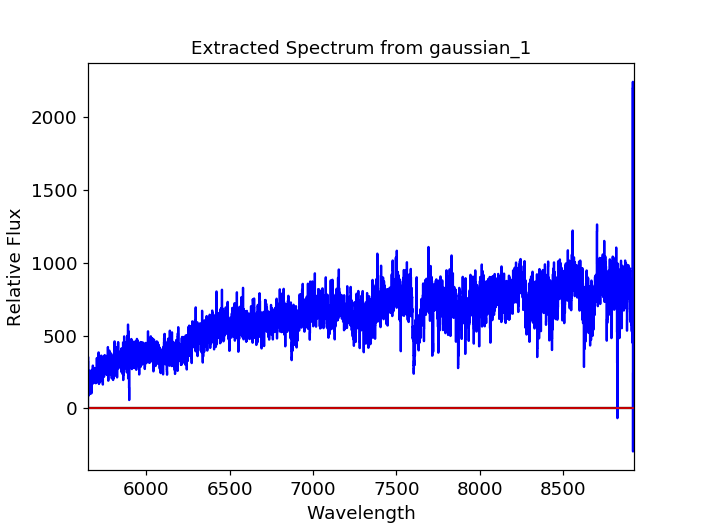

<IPython.core.display.Javascript object>


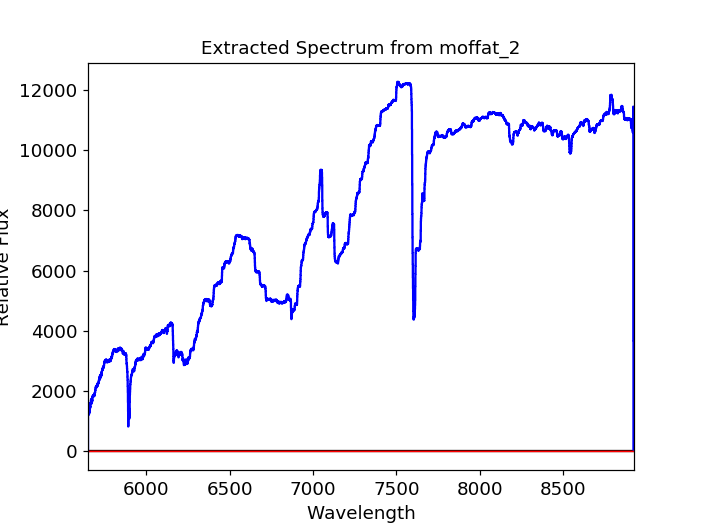

In [44]:
spec.extract(method='modelfit')

<IPython.core.display.Javascript object>


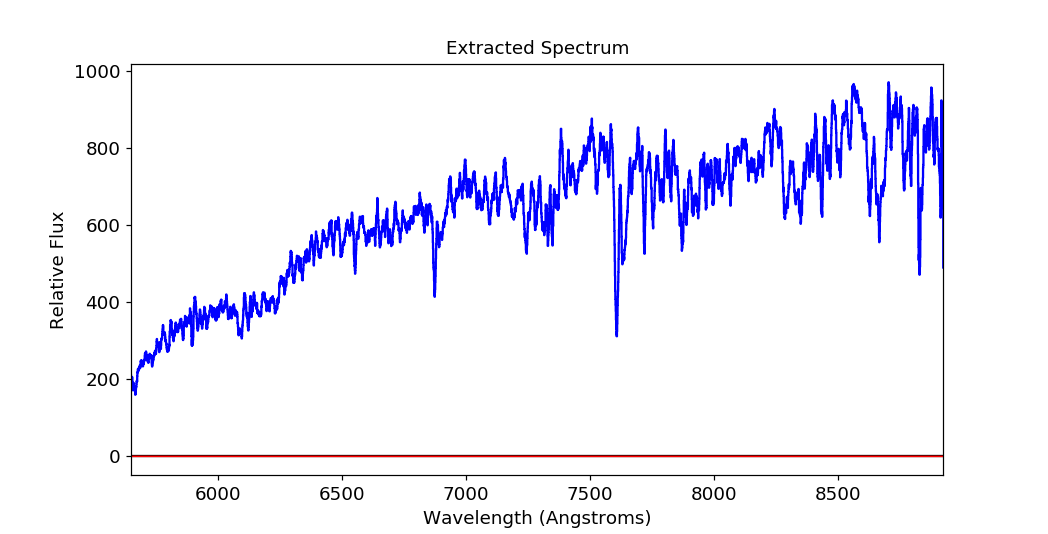

In [47]:
spec.spectra[0][1].smooth(11)

<IPython.core.display.Javascript object>


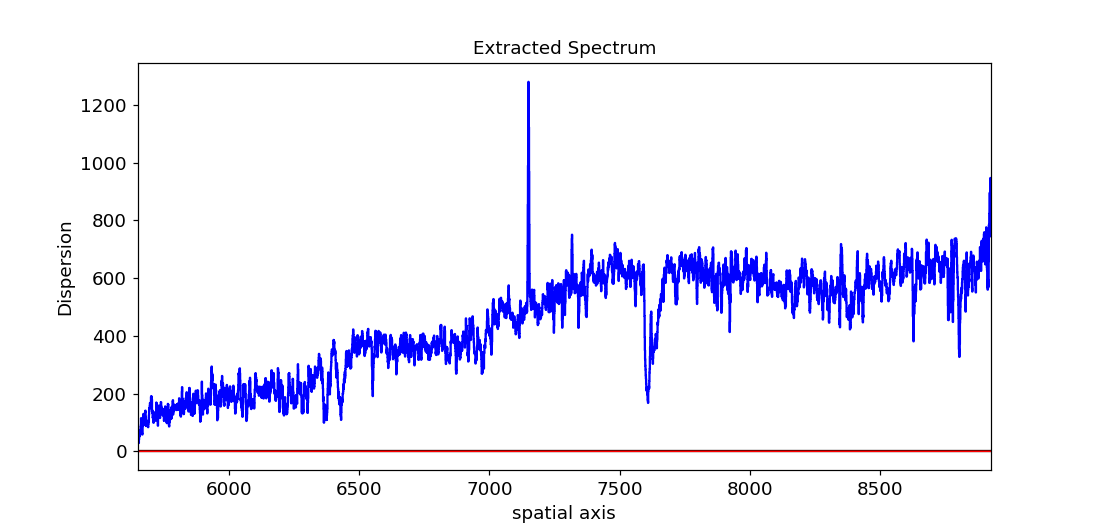

In [15]:
spec.spectra[0][1].smooth(5)